# JupyLabBook @ SIRIUS

In [1]:
# import custom libraries
from lib.extraction.common import PyNexus as PN
from lib.frontend import frontend as FE
from lib.extraction.GIXD import GIXD as GIXD


#import useful libraries
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats, Javascript, display

# necessary for plotting in the notebook
%matplotlib inline

# to avoid having a large notebook
set_matplotlib_formats('png', 'pdf')
    
# to have all the cells expanded (not collapsed)
display(Javascript('IPython.OutputArea.prototype._should_scroll = function(lines) {return false;}'))
        
# define the class experiment
class Experiment:
    """
    Class Experiment is used to pass arguments concerning the current experiment only.
    """
    def __init__(self):
        pass

# test if the expt already exists (avoid loosing info when reloading this cell)
try:
    expt.notebook_name
except:
    expt = Experiment() 

# necessary for saving in pdf
expt.notebook_name = 'JupyLabBook.ipynb'

# directory where the data will be saved
expt.working_dir = "working/"

# directory where the nexus files are 
expt.recording_dir = "recording/"

# directory where the logs are
expt.logs_dir = "logs/"   

<IPython.core.display.Javascript object>

In [2]:
FE.Check_files(expt)

Versions of modules used:
frontend: 2.0
PyNexus: v4.1
Check that you are using the last versions of the modules on: 
https://github.com/ArnaudHemmerle/JupyLabBook



<IPython.core.display.Javascript object>

### SIRIUS_2020_03_12_0756: continuous_ascan delta -24 -19 100 5

 - Open Nexus Data File :
	recording/SIRIUS_2020_03_12_0756.nxs
	. Number of data points:  101
	. Available Counters:
		 0  ------->  delta
		 1  ------->  zs
		 2  ------->  gamma
		 3  ------->  hu36energy
		 4  ------->  xs
		 5  ------->  energydcm
		 6  ------->  current
		 7  ------->  mon2
		 8  ------->  surfacepressure
		 9  ------->  areapermolecule
		 10  ------->  qxy
		 11  ------->  pilatus
		 12  ------->  pilatusroi1
		 13  ------->  integration_time
		 14  ------->  sensorsRelTimestamps
		 15  ------->  sensorsTimestamps
	. Pilatus data found, (column 11, alias pilatus)
	. qxy data found, (column 10, alias qxy)
	. Valid data between points 0 and 100
	. Surface pressure data found, mean value 19.74 ± 0.006163 mN/m
	. Area per molecule data found, mean value 0.3557 ± 3.866e-05 nm2 per molecule
	. Gamma motor data found, mean value -0.0004715 deg
	. Absorbers: Truc                                                                  


/Users/arnaudhemmerle/Documents/Recherche/Depository/JupyLabBook/lib/extraction/GIXD/GIXD.py:854: RuntimeWarning: divide by zero encountered in log
  ax2.contourf(x, y, np.log(mat_binned.transpose()))


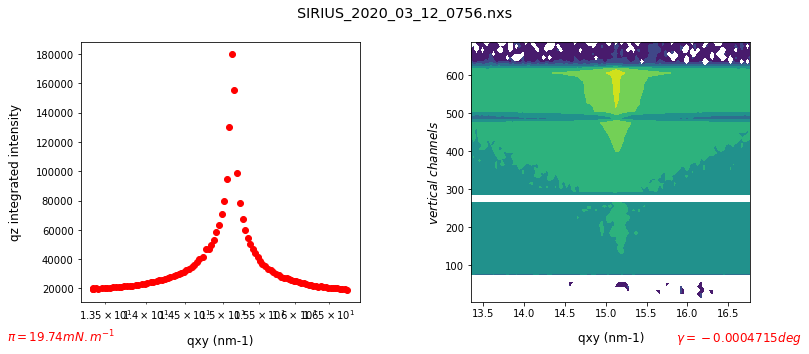

	. Original, non binned, matrix saved in:
	 working/SIRIUS_2020_03_12_0756_1D.mat
	. Scalar data saved in:
	 working/SIRIUS_2020_03_12_0756_1D.dat
	. Binned matrix saved in:
	 working/SIRIUS_2020_03_12_0756_1D.mat10
	. XYZ data saved in:
	 working/SIRIUS_2020_03_12_0756_1D.moy10
	. Binned matrix saved in:
	 working/SIRIUS_2020_03_12_0756_1D.mat20
	. XYZ data saved in:
	 working/SIRIUS_2020_03_12_0756_1D.moy20
	. Binned matrix saved in:
	 working/SIRIUS_2020_03_12_0756_1D.mat40
	. XYZ data saved in:
	 working/SIRIUS_2020_03_12_0756_1D.moy40


In [2]:
x, y, xlabel, ylabel, column_x,\
daty, datyTop, datyBottom, datyFirstQuarter,\
mat, mat_binned, ch_binned, \
mean_pi, mean_area, mean_gamma = \
GIXD.Treat(nxs_filename='SIRIUS_2020_03_12_0756.nxs', recording_dir=expt.recording_dir,
             channel0=607.5, thetazfactor=0.00024318628377198605, wavelength=0.155, thetac=0.0028,
             binsize=10, computeqz=False, 
             absorbers='Truc', logx=True, logy=False, logz=True, nblevels=50, cmap='jet',
             working_dir=expt.working_dir, moytocreate=[10, 20, 40],
             show_data_stamps=True, plot=True, save=True, verbose=True)

 - Open Nexus Data File :
	recording/SIRIUS_2020_03_12_0756.nxs
	. Number of data points:  101
	. Available Counters:
		 0  ------->  delta
		 1  ------->  zs
		 2  ------->  gamma
		 3  ------->  hu36energy
		 4  ------->  xs
		 5  ------->  energydcm
		 6  ------->  current
		 7  ------->  mon2
		 8  ------->  surfacepressure
		 9  ------->  areapermolecule
		 10  ------->  qxy
		 11  ------->  pilatus
		 12  ------->  pilatusroi1
		 13  ------->  integration_time
		 14  ------->  sensorsRelTimestamps
		 15  ------->  sensorsTimestamps
	. Pilatus data found, (column 11, alias pilatus)
	. qxy data found, (column 10, alias qxy)
	. Valid data between points 0 and 100
	. Surface pressure data found, mean value 19.74 ± 0.006163 mN/m
	. Area per molecule data found, mean value 0.3557 ± 3.866e-05 nm2 per molecule
	. Gamma motor data found, mean value -0.0004715 deg


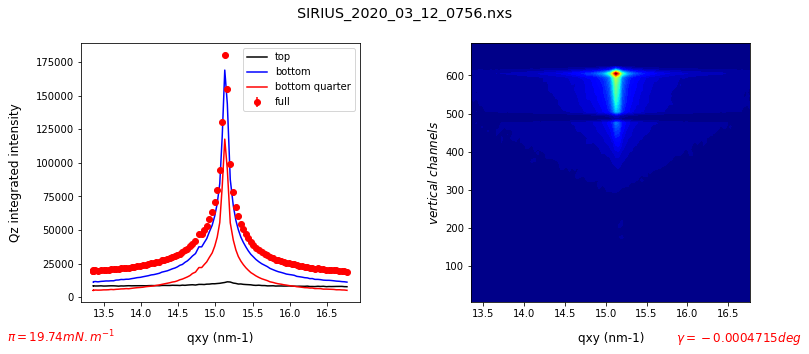

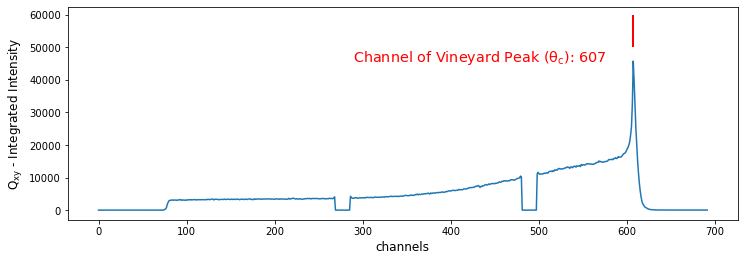

 Data not saved. To save data, run a GIXD on the scan. 
 Channel0: 607 


607

In [3]:
GIXD.Extract_channel0(nxs_filename='SIRIUS_2020_03_12_0756.nxs', recording_dir=expt.recording_dir)


0.00024318628377198605

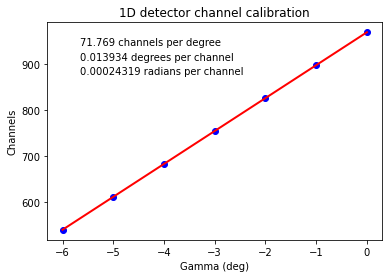

In [4]:
calib_thetaz_data=np.array([
# gamma  channel
[0,      970],
[-1,     899],
[-2,     827],
[-3,     755],
[-4,     683],
[-5,     611],
[-6,     539],
])

GIXD.Calib_thetaz(calib_thetaz_data)

In [5]:
print(GIXD.Treat.__doc__)


    Call functions for extracting, plotting, and saving the data.

    Parameters
    ----------
    nxs_filename : str
        nexus filename
    recording_dir : str
        directory where the nexus file is stored
    channel0 : float
        vertical channel corresponding to the Vineyard's peak
    thetazfactor : float
        factor for conversion from channel to radian in the vertical direction
    wavelength : float
        wavelength in nm
    thetac : float
        critical angle in rad
    binsize : int
        size in pixels of the vertical binning (along qz)
    computeqz : bool
        switch from pixels to qz in the vertical direction
    absorbers : str, optional
        text to display indicating which absorber was used
    logx : bool, optional
        log on the x axis of the integrated profile
    logy : bool, optional
        log on the y axis of the integrated profile
    logz : bool, optional
        log on the image
    nblevels : int, optional
        number of 